In [1]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [11]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [12]:
y_train=y_train.reshape(-1,)
y_train[:10]

array([6, 9, 9, 4, 1, 1, 2, 7, 8, 3], dtype=uint8)

In [13]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
classes[9]

'truck'

In [14]:
def plot_sample(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

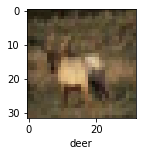

In [17]:
plot_sample(X_train,y_train,3)

In [18]:
X_train=X_train/255
X_test=X_test/255

In [19]:
ann=models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000,activation='relu'),
        layers.Dense(1000,activation='relu'),
        layers.Dense(10,activation='sigmoid'),    
])
ann.compile(optimizer="SGD",loss="sparse_categorical_crossentropy",metrics=['accuracy'])

ann.fit(X_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 85s 54ms/step - loss: 1.8120 - accuracy: 0.3572
Epoch 2/5
1563/1563 [==============================] - 77s 49ms/step - loss: 1.6268 - accuracy: 0.4270
Epoch 3/5
1563/1563 [==============================] - 77s 49ms/step - loss: 1.5418 - accuracy: 0.4575
Epoch 4/5
1563/1563 [==============================] - 79s 51ms/step - loss: 1.4818 - accuracy: 0.4766
Epoch 5/5
1563/1563 [==============================] - 77s 49ms/step - loss: 1.4322 - accuracy: 0.4952


In [20]:
ann.evaluate(X_test,y_test)

313/313 [==============================] - 8s 23ms/step - loss: 1.4571 - accuracy: 0.4787


[1.4570705890655518, 0.47870001196861267]

In [21]:
from sklearn.metrics import confusion_matrix,classification_report
y_pred=ann.predict(X_test)
y_pred_classes=[np.argmax(element) for element in y_pred]

print(classification_report(y_test,y_pred_classes))

313/313 [==============================] - 8s 25ms/step
              precision    recall  f1-score   support

           0       0.39      0.76      0.52      1000
           1       0.62      0.60      0.61      1000
           2       0.49      0.19      0.27      1000
           3       0.40      0.20      0.26      1000
           4       0.45      0.39      0.42      1000
           5       0.32      0.56      0.41      1000
           6       0.50      0.62      0.55      1000
           7       0.65      0.44      0.52      1000
           8       0.71      0.47      0.56      1000
           9       0.57      0.56      0.56      1000

    accuracy                           0.48     10000
   macro avg       0.51      0.48      0.47     10000
weighted avg       0.51      0.48      0.47     10000



## use CNN

In [34]:
cnn=models.Sequential([
    #cnn
    layers.Conv2D(filters=32, kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),    #conv layer. It will figure out the filters on its own. we dont have to tell explicitly.
                                                                                            #we need to tell filter size and how many filter to use
    layers.MaxPooling2D((2,2)),  #max pooling layer 
    layers.Conv2D(filters=32, kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),    
    layers.MaxPooling2D((2,2)),
    #dense
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax'),    
])

In [35]:
cnn.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=['accuracy'])

In [36]:
cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 36s 21ms/step - loss: 1.5426 - accuracy: 0.4448
Epoch 2/10
1563/1563 [==============================] - 34s 21ms/step - loss: 1.2167 - accuracy: 0.5702
Epoch 3/10
1563/1563 [==============================] - 35s 23ms/step - loss: 1.0917 - accuracy: 0.6159
Epoch 4/10
1563/1563 [==============================] - 32s 21ms/step - loss: 1.0101 - accuracy: 0.6448
Epoch 5/10
1563/1563 [==============================] - 32s 21ms/step - loss: 0.9507 - accuracy: 0.6674
Epoch 6/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.9029 - accuracy: 0.6843
Epoch 7/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.8643 - accuracy: 0.6967
Epoch 8/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.8329 - accuracy: 0.7088
Epoch 9/10
1563/1563 [==============================] - 35s 22ms/step - loss: 0.8007 - accuracy: 0.7190
Epoch 10/10
1563/1563 [==============================] - 32s 21m

In [37]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.9575 - accuracy: 0.6712


[0.9574598670005798, 0.6711999773979187]

In [38]:
y_test=y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

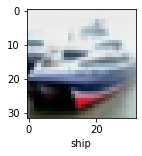

In [39]:
plot_sample(X_test,y_test,1)

In [40]:
y_pred=cnn.predict(X_test)
y_pred

313/313 [==============================] - 3s 9ms/step


array([[5.3617096e-04, 3.8992724e-04, 6.9165747e-03, ..., 3.9874110e-04,
        6.1990164e-02, 1.3675977e-03],
       [2.5045008e-03, 6.9555539e-01, 1.2771137e-07, ..., 1.8073402e-11,
        3.0158636e-01, 3.5226496e-04],
       [5.7368513e-02, 3.2690946e-02, 3.9761947e-04, ..., 4.4030976e-06,
        9.0339375e-01, 5.2033043e-03],
       ...,
       [4.4779496e-05, 1.8703612e-07, 1.1389379e-02, ..., 7.1028501e-02,
        2.1266293e-05, 3.0302770e-06],
       [1.3211574e-01, 2.1098947e-02, 4.0260674e-03, ..., 6.7781168e-04,
        6.6813162e-05, 1.1821556e-03],
       [3.6667770e-05, 1.7155380e-05, 1.0484385e-03, ..., 9.5433605e-01,
        7.0785421e-07, 1.0483584e-05]], dtype=float32)

In [41]:
y_classes = [np.argmax(e) for e in y_pred]
y_classes[:5]

[3, 1, 8, 8, 6]

In [42]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

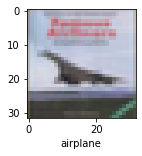

In [49]:
plot_sample(X_test,y_test,3)

In [50]:
classes[y_classes[3]]

'ship'

In [52]:
print(classification_report(y_test,y_classes))

              precision    recall  f1-score   support

           0       0.68      0.75      0.71      1000
           1       0.73      0.83      0.77      1000
           2       0.59      0.52      0.55      1000
           3       0.54      0.39      0.45      1000
           4       0.65      0.57      0.61      1000
           5       0.59      0.60      0.60      1000
           6       0.68      0.83      0.75      1000
           7       0.72      0.72      0.72      1000
           8       0.73      0.79      0.76      1000
           9       0.76      0.71      0.73      1000

    accuracy                           0.67     10000
   macro avg       0.67      0.67      0.67     10000
weighted avg       0.67      0.67      0.67     10000

